In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [106]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

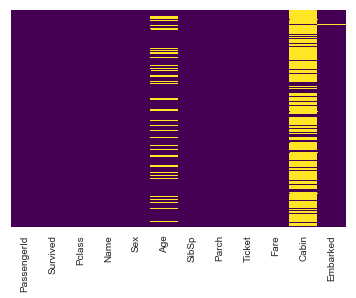

In [108]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [109]:
#!pip install plotly

In [110]:
import plotly.express as px
px.box(train,x='Pclass',y='Age')

In [111]:
def age_fill(df2):
    Age = df2[0]
    Pclass = df2[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [112]:
train['Age'] = train[['Age','Pclass']].apply(age_fill,axis =1)
test['Age'] = test[['Age','Pclass']].apply(age_fill,axis =1)

In [113]:
train['Age'].isnull().sum()

0

In [114]:
train = train.drop(columns='Cabin')
test = test.drop(columns='Cabin')

In [115]:
train['Embarked'].fillna('S', inplace=True)

In [116]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [117]:
import statistics 
val=statistics.mode(test['Fare'])

In [118]:
test['Fare'].fillna(val, inplace=True)

In [119]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [120]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [121]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=nan, strategy='most_frequent')

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


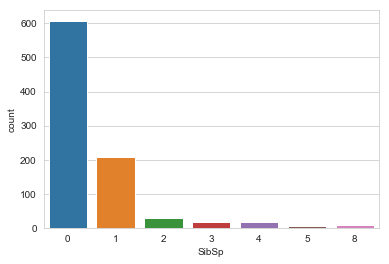

In [124]:
sns.countplot(x='SibSp',data=train)

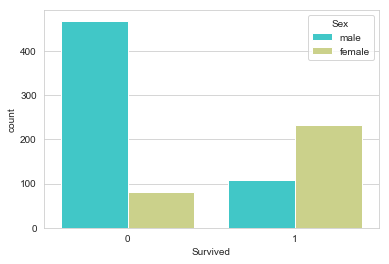

In [125]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

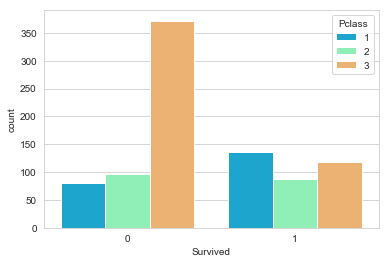

In [126]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [127]:
sex_train = pd.get_dummies(train['Sex'],drop_first=True)
embark_train = pd.get_dummies(train['Embarked'],drop_first=True)
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)

In [128]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [129]:
train1 = pd.concat([train,sex_train,embark_train],axis=1)
test1 = pd.concat([test,sex_test,embark_test],axis=1)

In [130]:
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [131]:
test1.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [132]:
test1.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
male      0
Q         0
S         0
dtype: int64

In [133]:
train1.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(train1.drop('Survived',axis=1), 
                                                    train1['Survived'], test_size=0.30, 
                                                    random_state=42)

In [136]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [138]:
modelLog=LogisticRegression()
modelDec=DecisionTreeClassifier()
modelRan=RandomForestClassifier(n_estimators=100)
modelSvm=SVC()

In [139]:
modelLog.fit(X_train,y_train)
modelDec.fit(X_train,y_train)
modelRan.fit(X_train,y_train)
modelSvm.fit(X_train,y_train)

C:\Users\Anurag Pareta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Anurag Pareta\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [140]:
y_predictLog = modelLog.predict(X_test)
y_predictDec = modelDec.predict(X_test)
y_predictRan = modelRan.predict(X_test)
y_predictSvm = modelSvm.predict(X_test)

In [141]:
print('Logistic: ')
print(classification_report(y_test, y_predictLog),'\n'*2)
print('DecisionT: ')
print(classification_report(y_test, y_predictDec),'\n'*2)
print('RandomF: ')
print(classification_report(y_test, y_predictRan),'\n'*2)
print('SVM: ')
print(classification_report(y_test, y_predictSvm),'\n'*2)

Logistic: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

   micro avg       0.80      0.80      0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268
 


DecisionT: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       157
           1       0.73      0.69      0.71       111

   micro avg       0.77      0.77      0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268
 


RandomF: 
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.76      0.70      0.73       111

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78  

In [142]:
print('Logistic: ',accuracy_score(y_test,y_predictLog))
print('DecisionT: ',accuracy_score(y_test,y_predictDec))
print('RandomF: ',accuracy_score(y_test,y_predictRan))
print('SVM: ',accuracy_score(y_test,y_predictSvm))

Logistic:  0.8022388059701493
DecisionT:  0.7686567164179104
RandomF:  0.7835820895522388
SVM:  0.6791044776119403


In [143]:
from sklearn.neighbors import KNeighborsClassifier
KnnModel = KNeighborsClassifier(n_neighbors=5)
KnnModel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [144]:
y_predictKnn = KnnModel.predict(X_test)

In [145]:
print('KNN: ')
print(classification_report(y_test, y_predictKnn))

KNN: 
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       157
           1       0.67      0.50      0.58       111

   micro avg       0.69      0.69      0.69       268
   macro avg       0.69      0.67      0.67       268
weighted avg       0.69      0.69      0.68       268



### We will prefer to use Logistic Regression as we are getting the best accuracy score

In [150]:
# X_train, X_test, y_train, y_test = train_test_split(train1.drop('Survived',axis=1), 
#                                                     train1['Survived'], test_size=0, 
#                                                     random_state=42)

In [151]:
X_train1 = train1.drop('Survived',axis =1)
y_train1 = train1['Survived']

In [162]:
print(X_train1.shape)
print(y_train1.shape)

(891, 8)
(891,)


In [163]:
modelLog.fit(X_train1,y_train1)

C:\Users\Anurag Pareta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [164]:
predictions_f = modelLog.predict(test1)

In [170]:
predictions_f.shape

(418,)

In [171]:
test1.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [175]:
test[['PassengerId']].to_csv('SubmsnFile.csv',index = False)

In [176]:
subFile = pd.read_csv('SubmsnFile.csv')

In [177]:
subFile['Survived'] = predictions_f

In [178]:
subFile.to_csv('SubmsnFile.csv',index=False)

In [179]:
subFile['Survived'].value_counts()

0    265
1    153
Name: Survived, dtype: int64

In [180]:
subFile.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
